In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [2]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [3]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


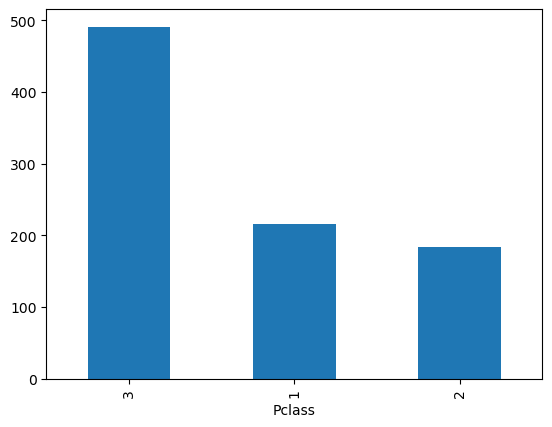

In [5]:
df_pclass = df_train["Pclass"].value_counts().plot(kind = "bar")

In [6]:
#1 for female and 0 for male
#C to 1 Q to 2 and S to 3

df_train["Sex"] = df_train["Sex"].map({"female" : 1, "male" : 0})
df_train["Embarked"] = df_train["Embarked"].map({"C": 1, "Q" : 2, "S": 3})
df_train_cleaned = df_train.drop(["Name", "Ticket","Cabin"], axis= 1)
df_train_cleaned

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,3.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,3.0
3,4,1,1,1,35.0,1,0,53.1000,3.0
4,5,0,3,0,35.0,0,0,8.0500,3.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,3.0
887,888,1,1,1,19.0,0,0,30.0000,3.0
888,889,0,3,1,NaN,1,2,23.4500,3.0
889,890,1,1,0,26.0,0,0,30.0000,1.0


In [7]:
df_test["Sex"] = df_test["Sex"].map({"female" : 1, "male" : 0})
df_test["Embarked"] = df_test["Embarked"].map({"C": 1, "Q" : 2, "S": 3})
df_test_cleaned = df_test.drop(["Name", "Ticket","Cabin"], axis= 1)
df_test_cleaned

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,3
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,3
4,896,3,1,22.0,1,1,12.2875,3
...,...,...,...,...,...,...,...,...
413,1305,3,0,NaN,0,0,8.0500,3
414,1306,1,1,39.0,0,0,108.9000,1
415,1307,3,0,38.5,0,0,7.2500,3
416,1308,3,0,NaN,0,0,8.0500,3


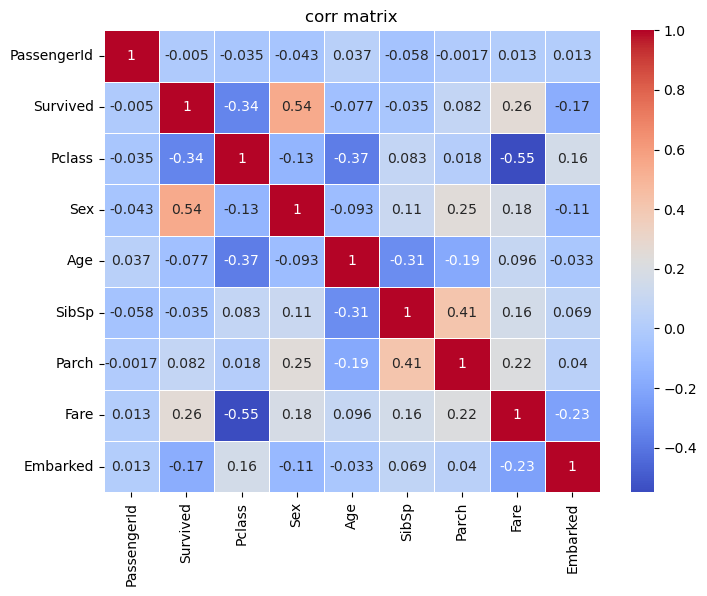

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df_train_cleaned.corr(),annot=True, cmap="coolwarm", linewidth=0.5)
plt.title("corr matrix")
plt.show()

<Axes: xlabel='Fare'>

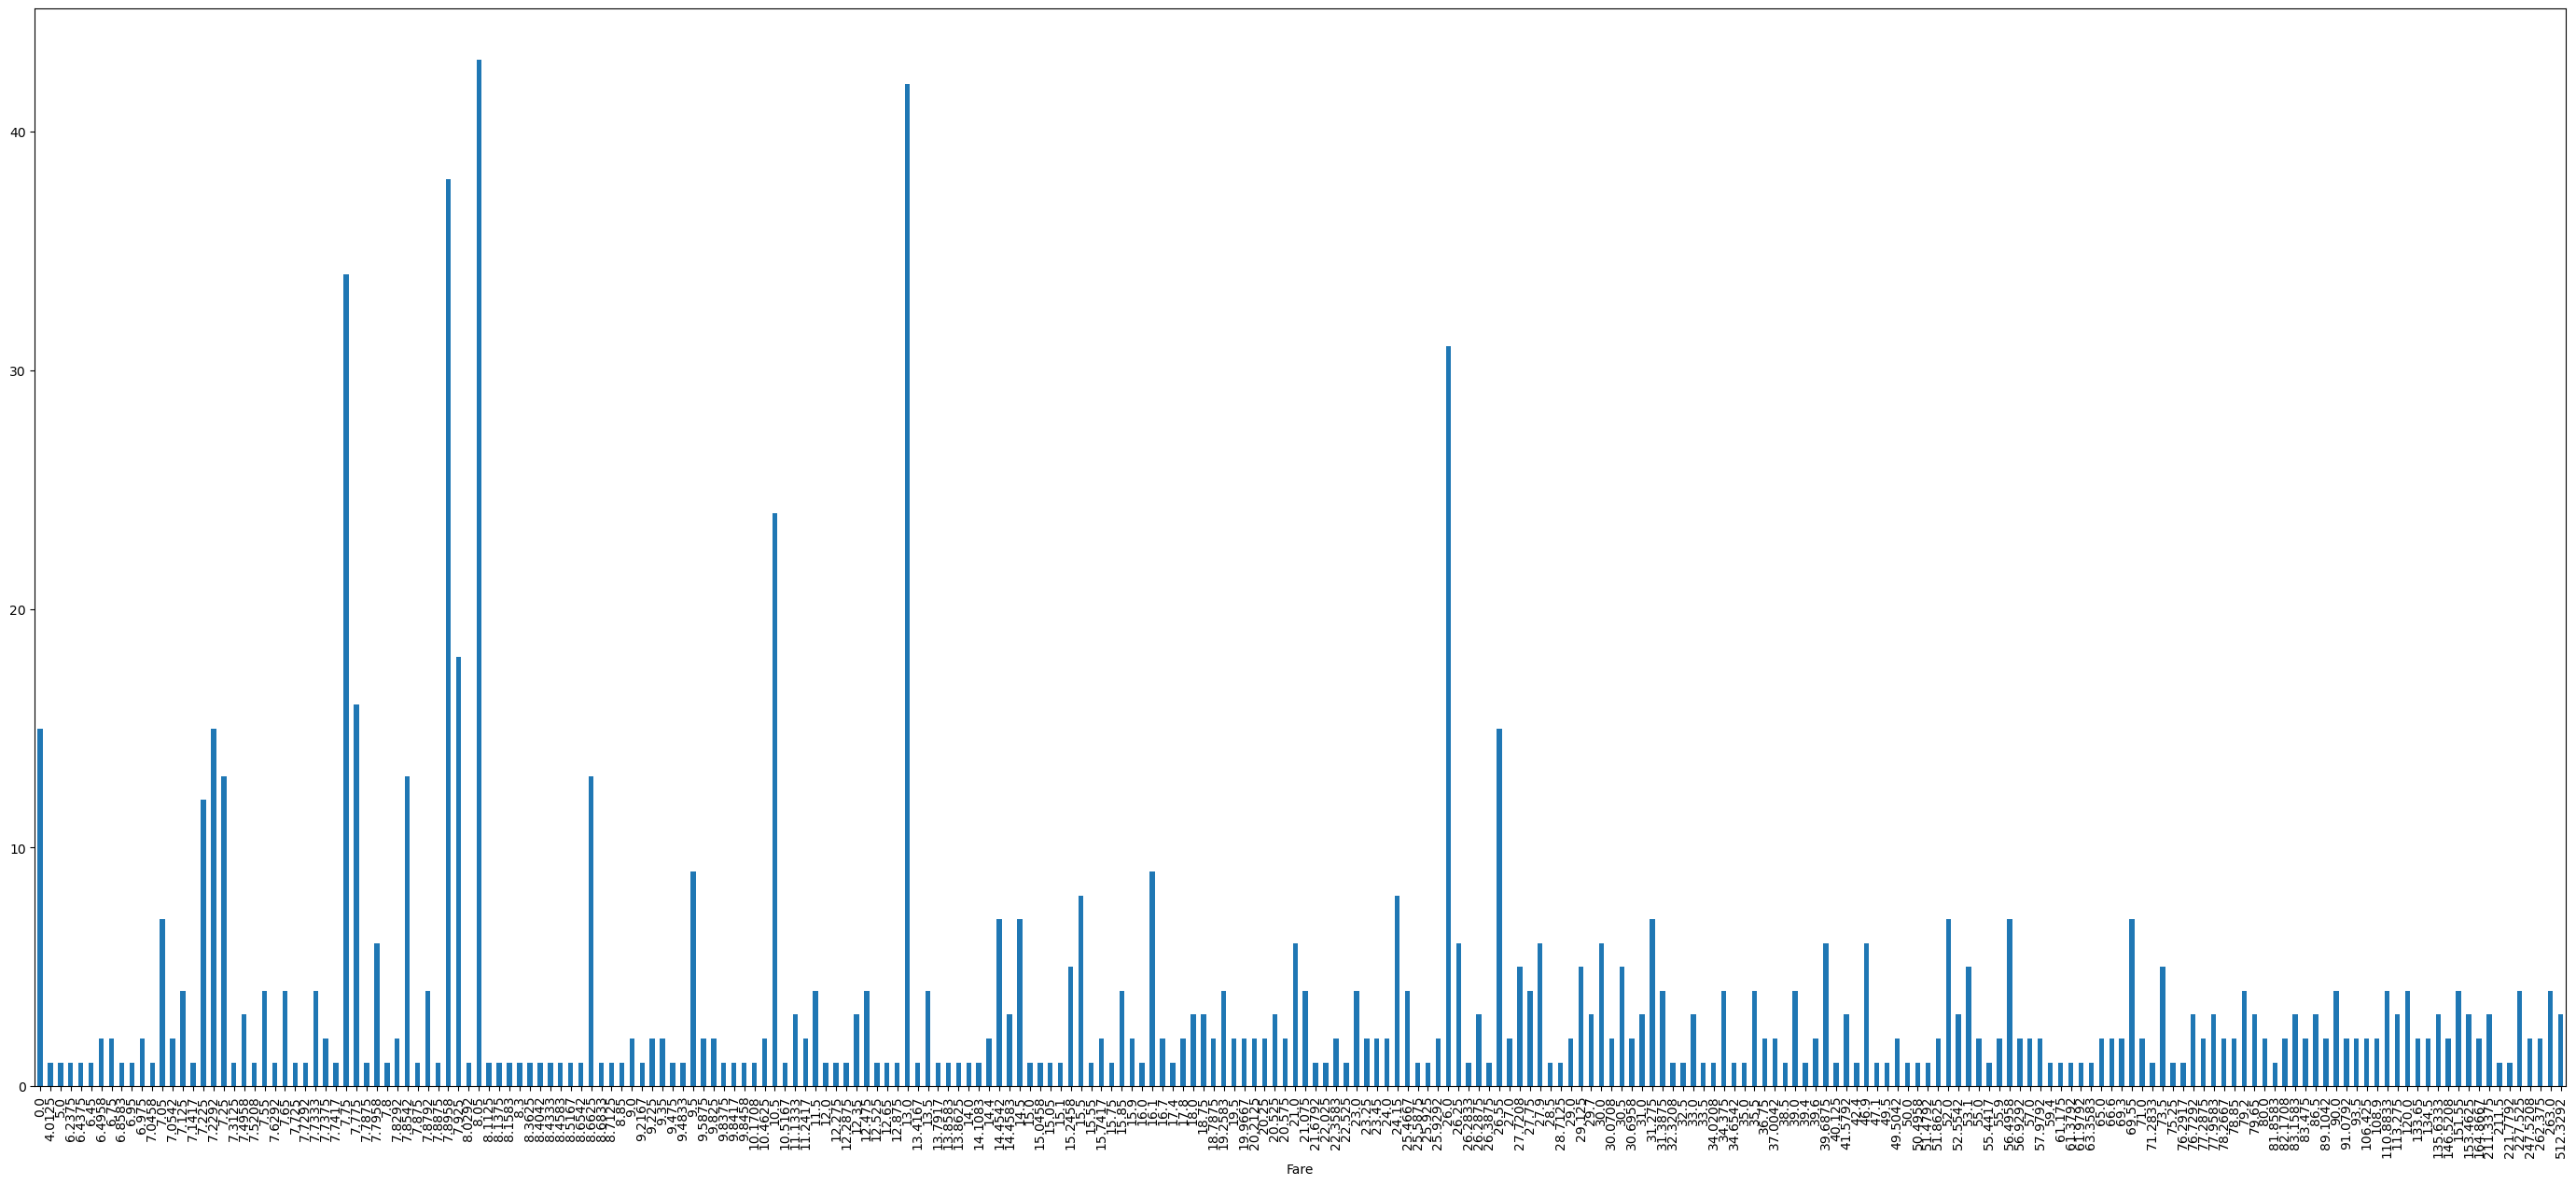

In [9]:
plt.figure(figsize=(35,15))

df_train_cleaned["Fare"].value_counts().sort_index().plot(kind = "bar")

In [10]:
df_train_cleaned['Age']=df_train_cleaned['Age'].fillna(df_train_cleaned['Age'].mean())
df_train_cleaned['Fare']=df_train_cleaned['Fare'].fillna(df_train_cleaned['Fare'].mean())
df_test_cleaned['Age']=df_train_cleaned['Age'].fillna(df_train_cleaned['Age'].mean())
df_test_cleaned['Fare']=df_train_cleaned['Fare'].fillna(df_train_cleaned['Fare'].mean())


In [11]:
df_test_cleaned.loc[ df_test_cleaned['Fare'] <= 7.91, 'Fare'] = 0
df_test_cleaned.loc[(df_test_cleaned['Fare'] > 7.91) & (df_test_cleaned['Fare'] <= 14.454), 'Fare'] = 1
df_test_cleaned.loc[(df_test_cleaned['Fare'] > 14.454) & (df_test_cleaned['Fare'] <= 31), 'Fare']   = 2
df_test_cleaned.loc[ df_test_cleaned['Fare'] > 31, 'Fare'] = 3
df_test_cleaned['Fare'] = df_test_cleaned['Fare'].astype(int)

df_train_cleaned.loc[ df_train_cleaned['Fare'] <= 7.91, 'Fare'] = 0
df_train_cleaned.loc[(df_train_cleaned['Fare'] > 7.91) & (df_train_cleaned['Fare'] <= 14.454), 'Fare'] = 1
df_train_cleaned.loc[(df_train_cleaned['Fare'] > 14.454) & (df_train_cleaned['Fare'] <= 31), 'Fare']   = 2
df_train_cleaned.loc[ df_train_cleaned['Fare'] > 31, 'Fare'] = 3
df_train_cleaned['Fare'] = df_train_cleaned['Fare'].astype(int)


In [12]:
df_test_cleaned.loc[ df_test_cleaned['Age'] <= 13.683, 'Age'] = 0
df_test_cleaned.loc[(df_test_cleaned['Age'] > 13.683) & (df_test_cleaned['Age'] <= 26.947), 'Age'] = 1
df_test_cleaned.loc[(df_test_cleaned['Age'] > 26.947) & (df_test_cleaned['Age'] <= 40.21), 'Age']   = 2
df_test_cleaned.loc[(df_test_cleaned['Age'] > 40.21) & (df_test_cleaned['Age'] <= 53.473), 'Age']   = 3
df_test_cleaned.loc[(df_test_cleaned['Age'] > 53.473) & (df_test_cleaned['Age'] <= 66.737), 'Age']   = 4
df_test_cleaned.loc[ df_test_cleaned['Age'] > 66.737, 'Age'] = 5
df_test_cleaned['Age'] = df_test_cleaned['Age'].astype(int)


df_train_cleaned.loc[ df_train_cleaned['Age'] <= 13.683, 'Age'] = 0
df_train_cleaned.loc[(df_train_cleaned['Age'] > 13.683) & (df_train_cleaned['Age'] <= 26.947), 'Age'] = 1
df_train_cleaned.loc[(df_train_cleaned['Age'] > 26.947) & (df_train_cleaned['Age'] <= 40.21), 'Age']   = 2
df_train_cleaned.loc[(df_train_cleaned['Age'] > 40.21) & (df_train_cleaned['Age'] <= 53.473), 'Age']   = 3
df_train_cleaned.loc[(df_train_cleaned['Age'] > 53.473) & (df_train_cleaned['Age'] <= 66.737), 'Age']   = 4
df_train_cleaned.loc[ df_train_cleaned['Age'] > 66.737, 'Age'] = 5
df_train_cleaned['Age'] = df_train_cleaned['Age'].astype(int)


In [13]:
df_train_cleaned = df_train_cleaned[df_train_cleaned["Embarked"].notna()]

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

input_data = scaler.fit_transform(df_train_cleaned.drop("Survived", axis =1))
target = df_train_cleaned["Survived"]

In [113]:
target_tensor = torch.Tensor(target)
input_tensor = torch.Tensor(input_data)

In [114]:
input_tensor.shape

torch.Size([889, 8])

In [115]:
import torch.optim as optim

In [116]:
#Multi layer perceptron
class TitanicMLP(nn.Module):
    def __init__(self):
        super(TitanicMLP, self).__init__()
        self.fc1 = nn.Linear(8, 12)
        self.fc2 = nn.Linear(12, 6)
        self.fc3 = nn.Linear(6, 1)  # One output unit for binary classification
        self.sigmoid = nn.Sigmoid()  # Define sigmoid activation separately

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))  # Apply sigmoid activation here
        return x

In [117]:
model = TitanicMLP()
criterion = nn.BCELoss()
optimizer= optim.Adam(model.parameters(), lr = 0.01)

In [118]:
target_tensor

tensor([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
        0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
        0., 1., 0., 1., 0., 0., 0., 1., 

In [119]:
epochs = 500

for epoch in range (epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(input_tensor)
    loss = criterion(outputs.squeeze(), (target_tensor))
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:  # Print loss every 50 epochs
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")

Epoch 0/500, Loss: 0.6652452349662781
Epoch 50/500, Loss: 0.4000464379787445
Epoch 100/500, Loss: 0.3670996129512787
Epoch 150/500, Loss: 0.3468947112560272
Epoch 200/500, Loss: 0.333514004945755
Epoch 250/500, Loss: 0.3214446008205414
Epoch 300/500, Loss: 0.3128573000431061
Epoch 350/500, Loss: 0.30485010147094727
Epoch 400/500, Loss: 0.29545295238494873
Epoch 450/500, Loss: 0.28291186690330505


In [120]:
outputs

tensor([[3.7184e-03],
        [9.8006e-01],
        [1.2649e-01],
        [9.9921e-01],
        [2.1518e-02],
        [2.6649e-01],
        [1.0320e-02],
        [3.5637e-04],
        [9.6095e-01],
        [9.9574e-01],
        [3.4660e-01],
        [9.9990e-01],
        [4.2510e-02],
        [6.1705e-10],
        [5.8555e-01],
        [9.9902e-01],
        [5.4589e-04],
        [1.4413e-01],
        [8.7789e-01],
        [9.8472e-01],
        [1.9900e-01],
        [1.4649e-01],
        [7.5564e-01],
        [1.6271e-01],
        [1.1483e-01],
        [9.9978e-01],
        [2.3026e-01],
        [5.0133e-02],
        [9.5365e-01],
        [4.3000e-02],
        [1.0594e-01],
        [9.7556e-01],
        [9.5364e-01],
        [4.8128e-03],
        [6.0464e-02],
        [3.0144e-02],
        [2.2766e-01],
        [5.8700e-02],
        [1.0665e-01],
        [9.8636e-01],
        [1.6762e-01],
        [9.5189e-01],
        [2.2496e-01],
        [7.8171e-01],
        [9.9026e-01],
        [3

In [124]:
model.eval()

# Disable gradient calculation for testing
with torch.no_grad():
    # Get model predictions
    test_outputs = model(torch.Tensor(df_test_cleaned.values))

In [125]:
df_test_cleaned.values.shape

(418, 8)

In [126]:
test_outputs

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [22]:
#decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [23]:
X = df_train_cleaned.drop("Survived", axis =1)
y = df_train_cleaned["Survived"]

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

In [24]:
dtree.predict(df_test_cleaned) #kaggle public score 0,746

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,